In [1]:
import msprime
import matplotlib.pyplot as plt
from sympy import symbols, exp
from sympy.plotting import plot

In [2]:
# set sample size and number of trials
n_samples=1
num=100000

In [3]:
# define the function that finds the least coalescent time
def t_mrca_api(tree_s):
    t_ca_list = []
    for tree in tree_s.trees():
        t_ca_list.append(tree_s.tables.nodes[tree.root].time)
    return(min(t_ca_list))

In [4]:
# run the simulation num times
t_mrca_list = []
for idxx in range(num):
    tree_s_sim = msprime.sim_ancestry(
        samples=n_samples,
        # num of recombinations per base per parent? 
        recombination_rate=1e-8,
        sequence_length=5000,
        population_size=10000,
        record_full_arg=True)
    # t_mrca_list.append(t_mrca_text(tree_s_sim.draw_text()))
    t_mrca_list.append(t_mrca_api(tree_s_sim))

Text(0.5, 0, 'Fastest Coalescent Time (?)')

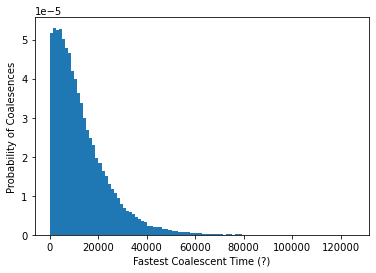

In [5]:
# plot the distribution
plt.hist(t_mrca_list, density=True, bins=100,range=(0,max(t_mrca_list)))
plt.ylabel("Probability of Coalesences")
plt.xlabel("Fastest Coalescent Time (?)")

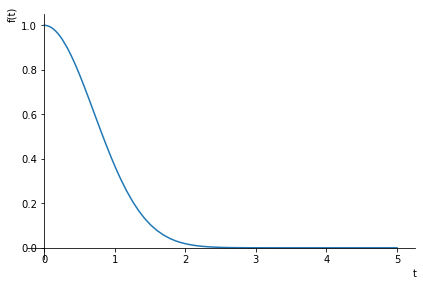

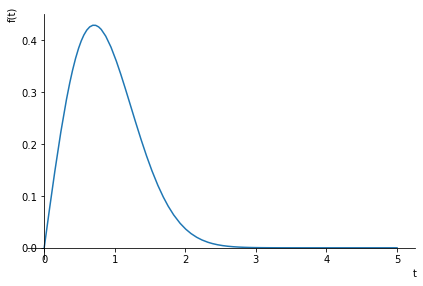

In [6]:
# plot the expectation
# CDF ~ exp(- R t^2 / N)
# PDF ~ t exp(- R t^2 / N)
t=symbols('t')
plot(exp(-t**2),(t,0,5))
plot(t*exp(-t**2),(t,0,5))

# save the data

In [7]:
print(t_mrca_list)

[1453.1527229489332, 5684.792010042697, 2588.2200650786904, 23255.836837681065, 26158.0190053829, 15696.720888081134, 2110.3714788637435, 10550.41135534507, 8067.834662088138, 32615.324096535085, 19173.213899722512, 4486.283603642053, 15318.224861072835, 7226.268447401112, 13465.245734147882, 172.05607939192754, 18261.12771904028, 11678.756602901592, 7434.389020154717, 20630.173647373118, 1981.7188138225965, 11625.551320134284, 4837.840641480313, 11409.215504380172, 10206.836488593037, 34354.26981992379, 6606.413251601647, 21849.579196146704, 8398.507360049944, 13089.79826057403, 4324.010304491599, 19983.003001472913, 569.8965300134125, 8571.756749548322, 2255.7797870880686, 15987.241345992257, 7044.862746270495, 9274.644378103321, 7781.8871751644165, 11370.535535371058, 3336.512240610702, 8961.485374492137, 2087.166757153926, 24453.910403797156, 18574.60102104338, 4424.579316428239, 5544.498996927096, 22262.422742689043, 20692.403124069868, 8561.017631010449, 6346.319389616968, 4423.9

# end save data